## Fashion MNIST

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

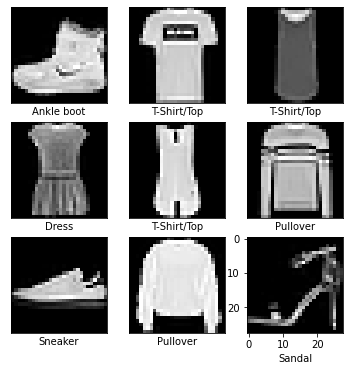

In [9]:
(X_train, y_train), (X_test, y_test) = load_data()
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(len(X_train), size=sample_size)

plt.figure(figsize=(6,6))
for i, idx in enumerate(random_idx):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

X_train = np.reshape(X_train / 255, (-1,28,28,1))
X_test = np.reshape(X_test / 255, (-1,28,28,1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.3)

In [33]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
           input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, 
                    validation_data=(X_val, y_val), verbose=0)

In [37]:
from history_plot import *

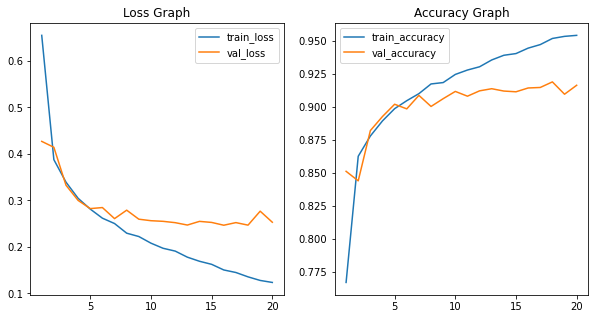

In [38]:
draw_history(history)

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2688 - accuracy: 0.9123


[0.2688325345516205, 0.9122999906539917]

## Applying Image Filter

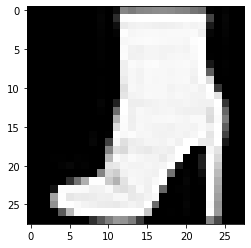

In [42]:
plt.imshow(X_train[0], cmap='gray')

In [44]:
import numpy as np
import cv2

In [45]:
horizontal_filter = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
])

vertical_filter = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1],
])

In [80]:
test_image = cv2.resize(X_train[0], (27,27))

In [81]:
def get_filtered_image(filter, image):
    filter_size=3
    image_size = image.shape[0]
    output_size = int((image_size - 3) / 1 + 1)
    filtered_image = np.zeros((output_size, output_size))
    
    for i in range(output_size):
        for j in range(output_size):
            indice_image = image[i:(i + filter_size),
                                 j:(j + filter_size)] * filter
            indice_sum = np.sum(indice_image)
            if indice_sum > 255:
                indice_sum = 255
            filtered_image[i, j] = indice_sum
    return filtered_image

In [82]:
vertical_filtered_image = get_filtered_image(vertical_filter, test_image)
horizontal_filtered_image = get_filtered_image(horizontal_filter, test_image)

In [83]:
sobel_image = np.sqrt(np.square(vertical_filtered_image) + 
                      np.square(horizontal_filtered_image))

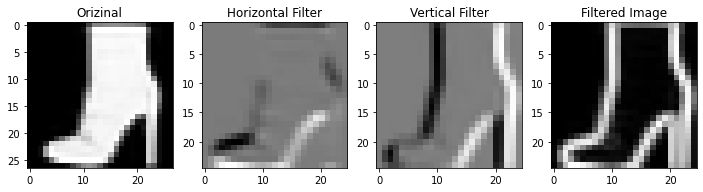

In [87]:
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.title('Orizinal')
plt.imshow(test_image, cmap='gray')

plt.subplot(1,4,2)
plt.title('Horizontal Filter')
plt.imshow(horizontal_filtered_image, cmap='gray')

plt.subplot(1,4,3)
plt.title('Vertical Filter')
plt.imshow(vertical_filtered_image, cmap='gray')

plt.subplot(1,4,4)
plt.title('Filtered Image')
plt.imshow(sobel_image, cmap='gray')

plt.show()